In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import importlib
import sys
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.interpolate import interp1d

In [2]:
import pk_pregen as PK
import lensingZ, tools
from cosmology import Cosmology

In [3]:
importlib.reload(PK)


<module 'pk_pregen' from '/global/u1/c/chmodi/Programs/BispectrumBias/CrossPostBorn/code/pk_pregen.py'>

In [4]:
runpb = '../data/RunPB/'
runpbpt = '../data/RunPB/PTdata/'
runpbfit = '../data/RunPB_datafit/'
cosmo = Cosmology(pfile='../data/RunPB/pklin_RunPB.txt', M=0.292)

In [183]:
pkmm = np.loadtxt('../data/RunPB_datafit/pkmmz_tab_z00-35-interp.txt')
kk = pkmm[:, 0]
pkmm = pkmm[:, 1:]
zz = np.arange(0,3.5,0.01)
ipkmmz = interp1d(zz, pkmm , fill_value=0, bounds_error=False)

pkhm = np.loadtxt('../data/RunPB_datafit/pkhmz_tab_z200-interp.txt')[:, 1:]
zzh = np.arange(2-0.25, 2+0.25, 0.01)
ipkhmz = interp1d(zzh, pkhm , fill_value=0, bounds_error=False)
# pkmm2 = np.loadtxt('../data/RunPB_datafit/pkmmz_tab_z00-35-interp.txt')[:,1:]

pkmmzcleft = PK.PkZCLEFT(0, 3.5, db=runpbpt)
ipkmmzcleft = lambda z: pkmmzcleft([z, 0, 0, 0, 0, 0, 0], auto=False)


In [51]:
ipz = []
for i, k in enumerate(kk):
    ipz.append(interpolate(pkmmzcleft.iz, pkmmzcleft.rsp[:, i, 1:4].sum(axis=-1)))

   

[]

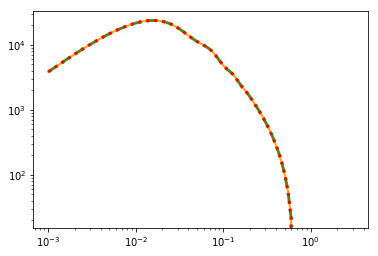

In [66]:
# plt.plot(kk, pkmmzcleft.rsp[:, :, 1:4].sum(axis=-1).T)
z = 0.113
# plt.plot(kk, pkmmzcleft.rsp[int(z*10), :, 1:4].sum(axis=-1).T, 'gray', lw=3, alpha=0.5)
# plt.plot(kk, pkmm[:, int(z*100)])
plt.plot(kk, ipkmmz(z), "orange", lw=2)
plt.plot(*pkmmzcleft([z]), "g--", lw=3, alpha=0.7)
plt.plot(kk, [p(z) for p in ipz], 'r:', lw=3)
# plt.plot(kk, [p(z) for p in ipz2], ':', color='orange', lw=3)
plt.loglog()

/global/u1/c/chmodi/Programs/BispectrumBias/CrossPostBorn/code/cosmology.py:151: RuntimeWarning: divide by zero encountered in true_divide
  return l/self.xia(a = a)
/global/u1/c/chmodi/Programs/BispectrumBias/CrossPostBorn/code/cosmology.py:151: RuntimeWarning: invalid value encountered in true_divide
  return l/self.xia(a = a)


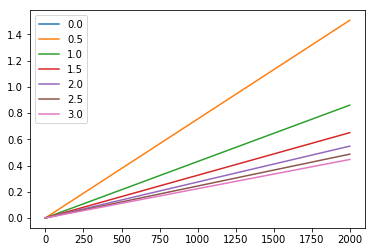

In [9]:
ell = np.linspace(0, 2000)

for z in np.arange(0., 3.5, 0.5):
    plt.plot(ell, cosmo.k_xil(ell, z=z), label=z)
    
plt.legend()

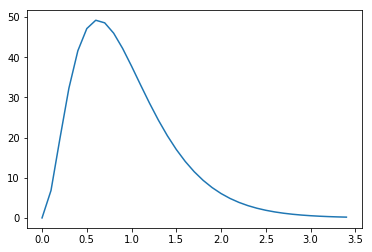

In [10]:
plt.plot(zz, tools.DnDz().lsst(zz))

In [11]:
lenz = lensingZ.LensingZ(2, dndz=tools.DnDz().lsst, cosmo=cosmo, dz=0.25)

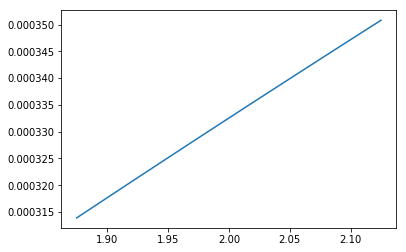

In [12]:
plt.plot(lenz.zs, lenz.kercmb)

0.00015489041911028665

(0.001, 10)

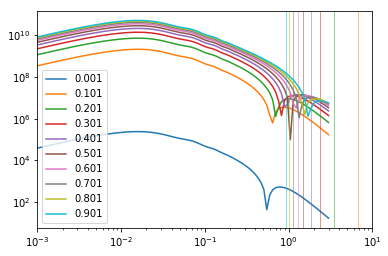

In [103]:
for i, z in enumerate(np.arange(0.001, 1, 0.1)):
#     plt.plot(kk, abs(ipkmmz(z)), 'C%d'%i, label=z)
    plt.plot(kk, cosmo.xia(z=z)**2*abs(ipkmmz(z)), 'C%d'%i, label=z)
    plt.axvline(cosmo.k_xil(2000, z), color= 'C%d'%i, lw=0.5)
plt.loglog()
plt.legend()
plt.xlim(1e-3, 10)

In [87]:
z = 0.134
%timeit pkmmzcleft([z])
%timeit ipkmmz(z)
%timeit (tools.lagrange2(z, zz)*pkmm).sum(axis=-1)

30.2 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
96.5 µs ± 4.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.3 ms ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [151]:
z = 0.01
ell = np.linspace(1, 2000, 1000)
kl = cosmo.k_xil(ell, z)
tmp = np.zeros_like(ell)
for i in range(ell.size):
    kl = cosmo.k_xil(ell[:i], z)
    tmp[i] = np.trapz(np.interp(kl, kk, ipkmmz(z))/ell[:i], ell[:i])

In [152]:
kl = cosmo.k_xil(ell, z)
# kl
# np.interp(kl, kk, ipkmmz(z))

(0.99, 1.01)

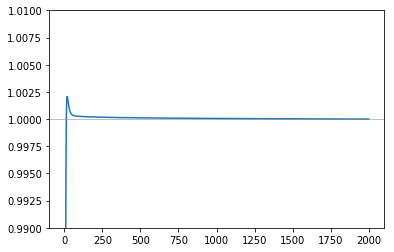

In [158]:
plt.plot(ell, tmp/tmp[-1])
# plt.yscale('log')
# plt.xlim(10, 2000)
plt.axhline(1, lw=0.5, color='gray')
plt.ylim(0.99, 1.01)

In [184]:
ikpkmmz = lambda z: (kk, ipkmmz(z))
ikpkhmz = lambda z: (kk, ipkhmz(z))

In [286]:
importlib.reload(lensingZ)

lenz = lensingZ.LensingZ(2, tools.DnDz().lsst, cosmo=cosmo)

In [287]:
intfac = lenz.clkg31d(ikpkhmz, ikpkmmz)

/global/u1/c/chmodi/Programs/BispectrumBias/CrossPostBorn/code/cosmology.py:151: RuntimeWarning: divide by zero encountered in true_divide
  return l/self.xia(a = a)


In [288]:
intfac

array([  4.78724673e-09,   4.75265296e-09,   4.71808369e-09, ...,
         3.37798379e-11,   3.37581319e-11,   3.37364259e-11])

[]

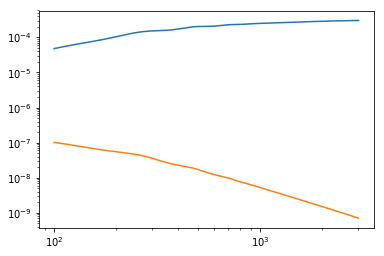

In [293]:
plt.plot(lenz.l, intfac*lenz.l**2)
plt.plot(lenz.l, lenz.clz(ikpkhmz, auto=False))
plt.loglog()

In [292]:
intfac/lenz.clz(ikpkhmz, auto=False)*100

array([ 4.72596993,  4.72643043,  4.7268736 , ...,  4.76081173,
        4.76083019,  4.76084867])

In [267]:
i0, i1 = intfac

In [268]:
lenz.kmesh.shape, i0.shape

((2901, 100), (2901, 100))

In [274]:
np.trapz((i1/lenz.l), lenz.l, axis=-1)

array([ 160937.58933578,  162729.76665977,  164534.11881077,
        166350.53127572,  168179.12242359,  170019.74086688,
        171872.55584033,  173737.40623129,  175614.50381692,
        177503.79574823,  179405.20688783,  181318.83377119,
        183244.65090443,  185182.72780639,  187133.08791078,
        189095.59758617,  191070.3533719 ,  193057.42410971,
        195056.74508941,  197068.40384771,  199092.34525735,
        201128.60471359,  203177.14741668,  205237.98040124,
        207311.11863725,  209396.69289843,  211494.59760468,
        213604.94821023,  215727.52515269,  217862.42278629,
        220009.79986717,  222169.63189808,  224341.80021719,
        226526.31594793,  228723.23692948,  230932.70398599,
        233154.51288716,  235388.76871208,  237635.29450718,
        239894.40705253,  242165.9505003 ,  244449.96314999,
        246746.23720679,  249055.33984931,  251377.32632504,
        253709.94867416,  256055.98734251,  258416.05966755,
        260786.78251994,

In [253]:
np.trapz(i0, lenz.xis, axis=-1)

ValueError: operands could not be broadcast together with shapes (1,99) (100,2900) 

In [248]:
np.trapz(i1/lenz.l.reshape(-1, 1), lenz.l, axis=0)

array([  2.92989711e-10,   2.89966903e-10,   2.86965333e-10,
         2.83994920e-10,   2.81045369e-10,   2.78125610e-10,
         2.75227642e-10,   2.72358848e-10,   2.69510725e-10,
         2.66691676e-10,   2.63895038e-10,   2.61125486e-10,
         2.58376722e-10,   2.55655793e-10,   2.52956869e-10,
         2.50285667e-10,   2.47635290e-10,   2.45011422e-10,
         2.42409247e-10,   2.39833114e-10,   2.37277679e-10,
         2.34747130e-10,   2.32238047e-10,   2.29755268e-10,
         2.27293208e-10,   2.24855332e-10,   2.22438497e-10,
         2.20046043e-10,   2.17674208e-10,   2.15325725e-10,
         2.12997835e-10,   2.10693576e-10,   2.08409755e-10,
         2.06148897e-10,   2.03908506e-10,   2.01689896e-10,
         1.99491967e-10,   1.97315770e-10,   1.95159689e-10,
         1.93024349e-10,   1.90909566e-10,   1.88816646e-10,
         1.86742980e-10,   1.84689313e-10,   1.82655244e-10,
         1.80641595e-10,   1.78647133e-10,   1.76672431e-10,
         1.74717459e-10,

In [240]:
i1l = np.zeros_like(i1)
for i in range(i1.shape[1]):
    i1l[:, i] = i1[:, i]/lenz.l

In [246]:
np.unique((i1/lenz.l.reshape(-1, 1))/i1l)

/global/homes/c/chmodi/.conda/envs/fastpm/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([  1.,  nan,  nan, ...,  nan,  nan,  nan])

In [213]:
t0 = intfac[0].copy()
t1 = intfac[1].copy()
t0 = t0.reshape(t0.shape[0], t0.shape[1], -1)
# t1 = t1.reshape(-1, t1.shape[0], t1.shape[1])

In [214]:
t0.shape, t1.T.shape

((100, 2901, 1), (100, 2901))

In [217]:
test = t0*t1
test3 = np.dot(intfac[0].reshape())

In [222]:
test2 = np.zeros_like(test)

for i in range(100):
    for j in range(2901):
        for k in range(100):
            test2[i, j, k] = intfac[0][i, j]*intfac[1][j, k]

In [223]:
test2

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 